      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000        

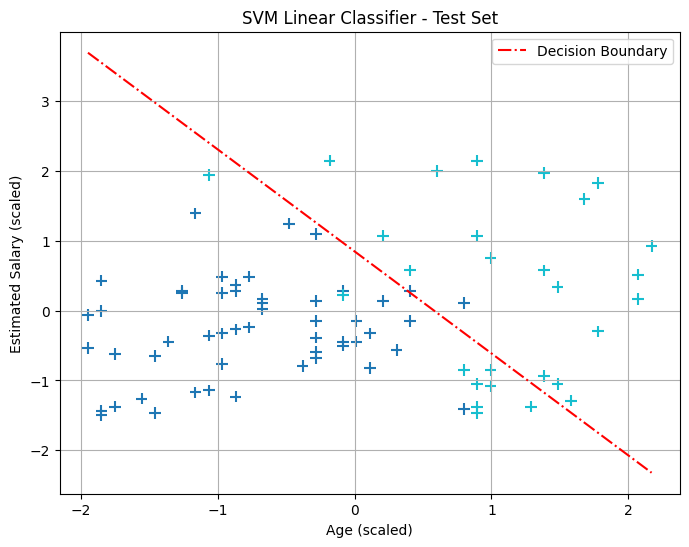

In [5]:
#SVC : Linear Data
#1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

#2. Load the Dataset
data=pd.read_csv("Social_Network_Ads.csv")
print(data)
print("\n")
print(data.head())
print("\n")
print("Data shape:", data.shape)

#3. Split Data into Input (X) and Output (Y)
x=data.iloc[:,[2,3]] #From -> Age and Salary
y=data.iloc[:,4] # Predict -> Purchased
print(x.head())
print("\n")
print(y.head())

#4. Split Dataset into Train and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

#5. Feature Scaling (Very Important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#6. Train the SVM Classifier
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, Y_train)

#7. Make Predictions
Y_pred = classifier.predict(X_test)
print("Predicted Output:\n", Y_pred)

#8. Evaluate the Model
print("Accuracy Score with linear kernel:", metrics.accuracy_score(Y_test, Y_pred))

#9. Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='tab10',marker='+', s=70)

#10. Plot the Hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max())
yy = a * xx - (classifier.intercept_[0] / w[1])
plt.plot(xx, yy, 'r-.', label='Decision Boundary')

#11. Final Plot Settings
plt.title("SVM Linear Classifier - Test Set")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend()
plt.grid(True)
plt.show()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 5)
(320, 2) (80, 2) (320,) (80,)
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0]
Accuracy Score: With polynomial kernel
0.9125


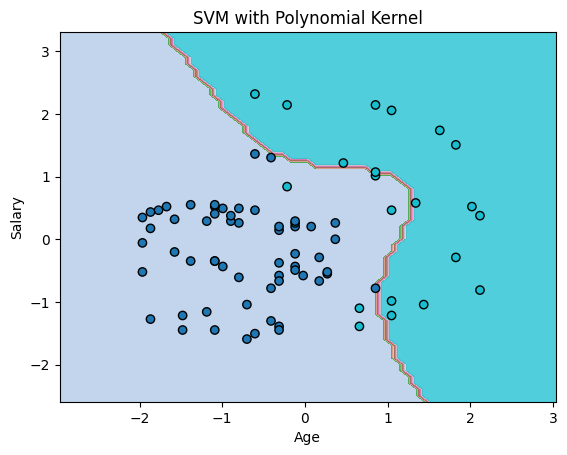

In [41]:
#SVC : Non-Linear Data
#1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

#2. Load the Dataset
data = pd.read_csv("Social_Network_Ads.csv")
print(data.head()) # Corrected from head() to data.head()
print(data.shape)

#3. Split Data into Input (X) and Output (Y)
x = data.iloc[:, [2, 3]] # Age and Salary as input variables
y = data.iloc[:, 4] # Purchased as output variable

#4. Split Dataset into Train and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the classifier with a polynomial kernel
classifier = SVC(kernel='poly')
classifier.fit(X_train, Y_train)

# Predict the test set results
Y_pred = classifier.predict(X_test)
print(Y_pred)

# Calculate and print accuracy score
print("Accuracy Score: With polynomial kernel")
print(metrics.accuracy_score(Y_test, Y_pred))

# Visualize the decision boundary using a contour plot
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and the test data points
plt.contourf(xx, yy, Z, alpha=0.75, cmap='tab20')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k',marker='o', cmap='tab10')
plt.title("SVM with Polynomial Kernel")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

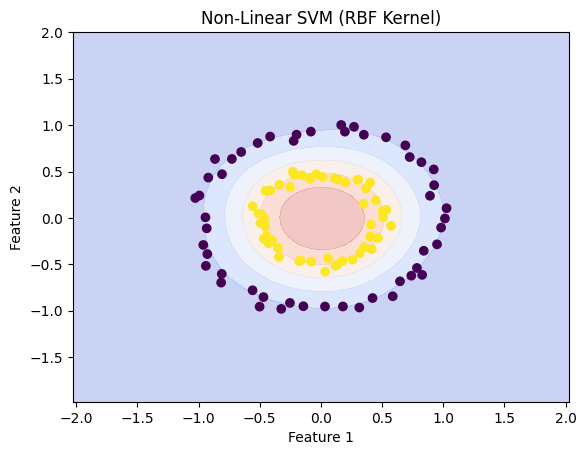

In [7]:
# NON- LINEAR SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Create non-linearly separable data
X, y = make_circles(
    n_samples=100, factor=0.5, 
    noise=0.05, random_state=1
)

# Train an SVM with a radial basis function (RBF) kernel
classifier = SVC(kernel='rbf', C=1.0, gamma='scale') # gamma controls the width of the RBF kernel
classifier.fit(X, y)

# Create a meshgrid to plot the decision boundary
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min,x_max, 100),
    np.linspace(y_min,y_max, 100)
)

# Plot the data and decision boundary
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

#Filled contour
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linear SVM (RBF Kernel)")
plt.show()

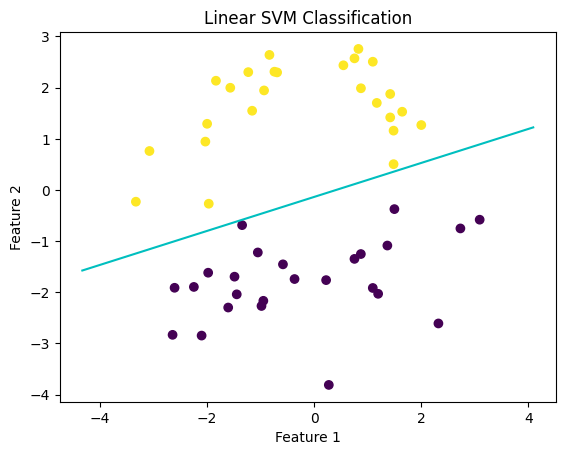

Prediction for [[2 1]]: [1]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
# Create synthetic data (two classes)
X, y =make_classification(
	n_samples=50, n_features=2, n_informative=2,
	n_redundant=0,random_state=1,class_sep=1.5
)

# Train a linear SVM classifier
classifier = SVC(kernel='linear', C=1.0) # C is the regularization parameter
classifier.fit(X, y)

# Get the separating hyperplane
w = classifier.coef_[0]
b = classifier.intercept_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = (-b - w[0] * xx) / w[1]

# Plot the data and decision boundary
plt.scatter(X[:, 0],X[:, 1],c=y,cmap='viridis')
plt.plot(xx, yy, "c-") # Plot the hyperplane

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM Classification")
plt.show()

# Example of making predictions
new_data = np.array([[2, 1]]) # Example data point
prediction = classifier.predict(new_data)
print(f"Prediction for {new_data}: {prediction}")

Predicted Score for 5 hours of study:73.33


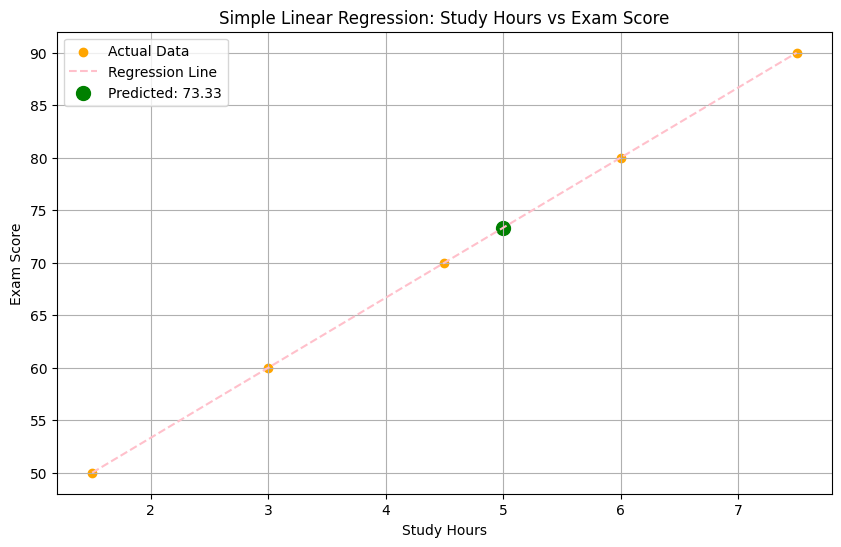

In [1]:
#LINEAR REGRESSION WITH ARRAYS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  

X = np.array([1.5, 3.0, 4.5, 6.0, 7.5]).reshape(-1, 1)
y = np.array([50, 60, 70, 80, 90])


model = LinearRegression().fit(X, y)

new_study_hours = np.array([[5.0]])
predicted_score = model.predict(new_study_hours)
print(f"Predicted Score for 5 hours of study:{predicted_score[0]:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', label='Actual Data')
plt.plot(X, model.predict(X), color='pink', linestyle='dashed', label='Regression Line')

plt.scatter(
    new_study_hours, predicted_score, 
    color='green', marker='o', s=100, 
    label=f'Predicted: {predicted_score[0]:.2f}'
)

plt.xlabel("Study Hours") 
plt.ylabel("Exam Score")
plt.title("Simple Linear Regression: Study Hours vs Exam Score") 
plt.legend() 
plt.grid(True)
plt.show()

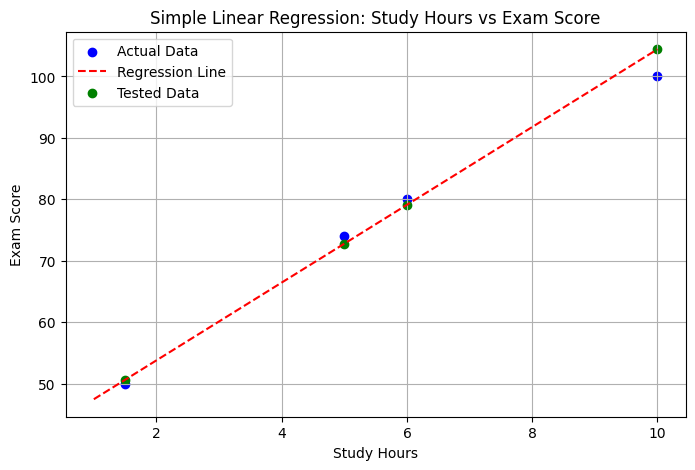

Predicted Exam Score for 7.5 Study Hours: 88.61


In [13]:
#LINEAR REGRESSION WITH CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 2: Load Data from CSV File
df = pd.read_csv("study_exam.csv")

# Step 3: Prepare Features (X) and Target Variable (y)
X = df[['Study Hours']].values
y = df['Exam Score'].values

# Step 4: Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Train the Linear Regression Model
model = LinearRegression().fit(X_train, y_train)

# Step 6: Make Predictions on Test Data
predicted_scores = model.predict(X_test)

# Step 7: Visualize the Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', linestyle='dashed', label="Regression Line")
plt.scatter(X_test, predicted_scores, color='green', label="Tested Data")

# Step 8: Customize the Plot
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Simple Linear Regression: Study Hours vs Exam Score")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Predict Exam Score for 7.5 Study Hours
new_study_hours = np.array([[7.5]])
predicted_score = model.predict(new_study_hours)
print(f"Predicted Exam Score for 7.5 Study Hours: {predicted_score[0]:.2f}")

Predicted House Price: $422994.1040758781


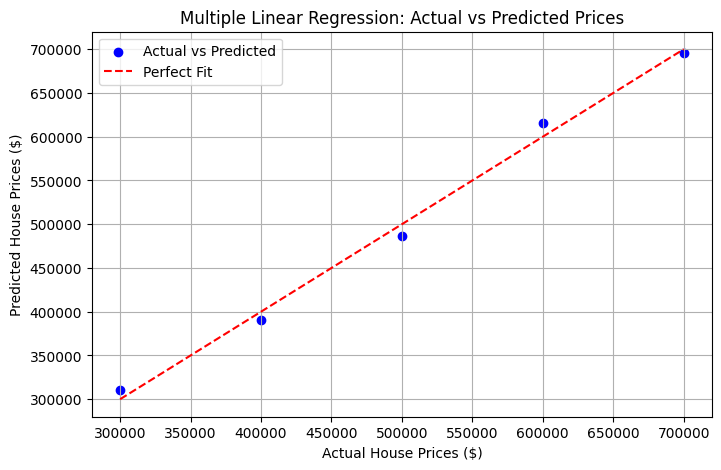

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the Data
X = np.array([
 [1500, 3, 10],
 [1800, 4, 5],
 [2400, 4, 20],
 [3000, 5, 15],
 [3500, 5, 8]
]) # Features: Size, Bedrooms, Age
y = np.array([300000, 400000, 500000, 600000, 700000]) # Target: Price

# Step 2: Train the Model
model = LinearRegression().fit(X, y)

# Step 3: Make a Prediction
new_house = np.array([[2000, 4, 10]]) # Predict for a house with 2000 sq ft, 4 bedrooms, 10 years old
predicted_price = model.predict(new_house)
print(f"Predicted House Price: ${predicted_price[0]}")

predicted_prices = model.predict(X)

# Step 4: Visualizing Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y, predicted_prices, color='blue', label='Actual vs Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label='Perfect Fit')

plt.title("Multiple Linear Regression: Actual vs Predicted Prices")
plt.xlabel("Actual House Prices ($)")
plt.ylabel("Predicted House Prices ($)")
plt.legend()
plt.grid(True)
plt.show()

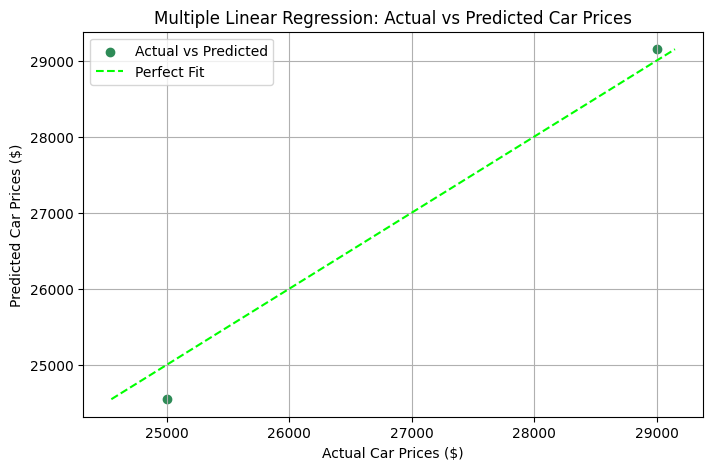

Predicted Car Price: $30,917.50


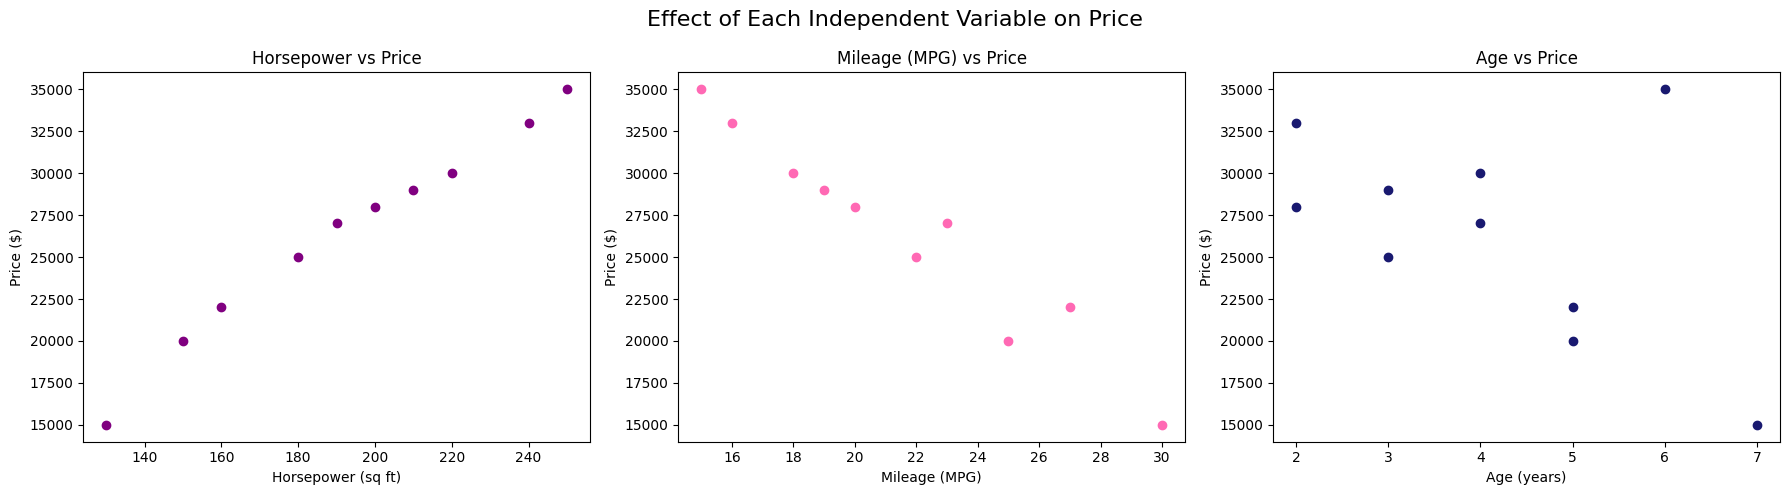

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Load Data from CSV
df = pd.read_csv("car_data.csv") # Load the dataset

# Step 2: Prepare Features and Target Variable
X = df[['Horsepower', 'Mileage (MPG)', 'Age (years)']].values # Features
y = df['Price ($)'].values # Target variable

# Step 3: Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make a Prediction
new_car = np.array([[220, 22, 4]]) # Predict for a car with 220 HP, 22 MPG, 4 years old
predicted_price = model.predict(new_car)

# Step 6: Visualizing Predictions
predicted_prices = model.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predicted_prices, color='seagreen', label='Actual vs Predicted')
plt.plot([min(predicted_prices), max(predicted_prices)], [min(predicted_prices), max(predicted_prices)], color='lime', linestyle='dashed',label='Perfect Fit')

plt.xlabel("Actual Car Prices ($)")
plt.ylabel("Predicted Car Prices ($)")
plt.title("Multiple Linear Regression: Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted car price
print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Size vs Price
axs[0].scatter(X[:, 0], y, color='purple')
axs[0].set_title('Horsepower vs Price')
axs[0].set_xlabel('Horsepower (sq ft)')
axs[0].set_ylabel('Price ($)')

# Bedrooms vs Price
axs[1].scatter(X[:, 1], y, color='hotpink')
axs[1].set_title('Mileage (MPG) vs Price')
axs[1].set_xlabel('Mileage (MPG)')
axs[1].set_ylabel('Price ($)')

# Age vs Price
axs[2].scatter(X[:, 2], y, color='midnightblue')
axs[2].set_title('Age vs Price')
axs[2].set_xlabel('Age (years)')
axs[2].set_ylabel('Price ($)')

plt.suptitle("Effect of Each Independent Variable on Price", fontsize=16)
plt.tight_layout()
plt.show()
